In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
from neuralprophet import NeuralProphet

c:\Miniconda3\envs\intern\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_excel('../daily_data_2021_to_2023.xlsx')
df.head()

,Date,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
0,23-06-2023,22.05,333.54,-,179.5,1574.88,11021.46,33544.27,8508.69,3637.10,4718.86,862.55,73407.61,5.18,147806.44,147806.44
1,14-01-2022,-,1137.96,-,2657.39,-,23.47,41.23,155.09,271.82,178.26,-,2279.65,-,7744.77,7744.77
2,19-07-2022,-,983.86,-,665.57,2.50,2042.43,-,389.75,57.77,-,-,4098.83,454.78,9694.26,9694.26
3,15-01-2022,-,1036.35,-,2858.61,-,26.60,52.88,180.51,27.20,118.34,-,2328.81,-,7625.66,7625.66
4,04-03-2021,-,1060.72,-,286.12,18011.60,22951.03,1700.00,69651.70,10049.53,576.72,2687.90,61490.92,5680.00,195142.31,197380.93


In [24]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.sort_values(by='Date', inplace=True)
df.reset_index(inplace=True, drop=True)
df.drop('index', inplace=True, axis=1)
df.head()

,Date,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
0,2021-01-01,605.02,1726.52,13618.92,468.38,21401.74,24508.57,2400.0,60931.20,9387.48,540.80,3249.30,35848.57,6105.0,172509.52,172509.52
1,2021-01-02,196.68,1564.11,13877.54,216.00,26037.07,28410.74,NaN,57619.45,13055.97,483.60,2261.28,40121.49,6360.0,181722.80,181722.80
2,2021-01-03,236.21,1798.70,11257.11,411.94,26628.81,27061.66,NaN,51113.54,13176.51,697.16,2672.50,46251.51,2715.0,177161.26,177161.26
3,2021-01-04,127.75,2009.93,12141.87,372.25,28270.30,15970.95,NaN,53456.41,15575.81,755.58,2702.25,59565.27,2225.0,185698.56,185698.56
4,2021-01-05,165.57,1833.25,11929.75,292.70,22619.43,22700.87,NaN,64673.62,15496.28,677.17,2643.65,52591.89,1875.0,190205.91,190205.90


In [6]:
for col in  df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
df.dtypes

Date              datetime64[ns]
A1                       float64
A2                       float64
E1                       float64
E2                       float64
N1                       float64
N2                       float64
N3                       float64
S1                       float64
S2                       float64
S3                       float64
W1                       float64
W2                       float64
W3                       float64
Cleared Volume           float64
MCV                      float64
dtype: object

<Axes: >

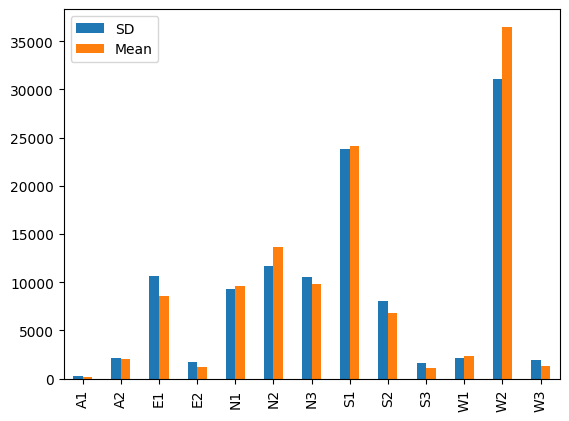

In [8]:
pd.concat([df.iloc[:, 1:-2].std().rename("SD"), df.iloc[:, 1:-2].mean().rename("Mean")],axis=1).plot.bar()

In [8]:
e1_ts = df["E1"] # Highest demand and Highest varience
# Areas near E1 -> A2, N2, W3, E2 (To see if there is an offset -> When demand increase or decrease in e1...depend on another region demand)
a2_ts = df["A2"]
n2_ts = df["N2"]
w3_ts = df["W3"]
e2_ts = df["E2"]

 


w3_ts = df["W3"]

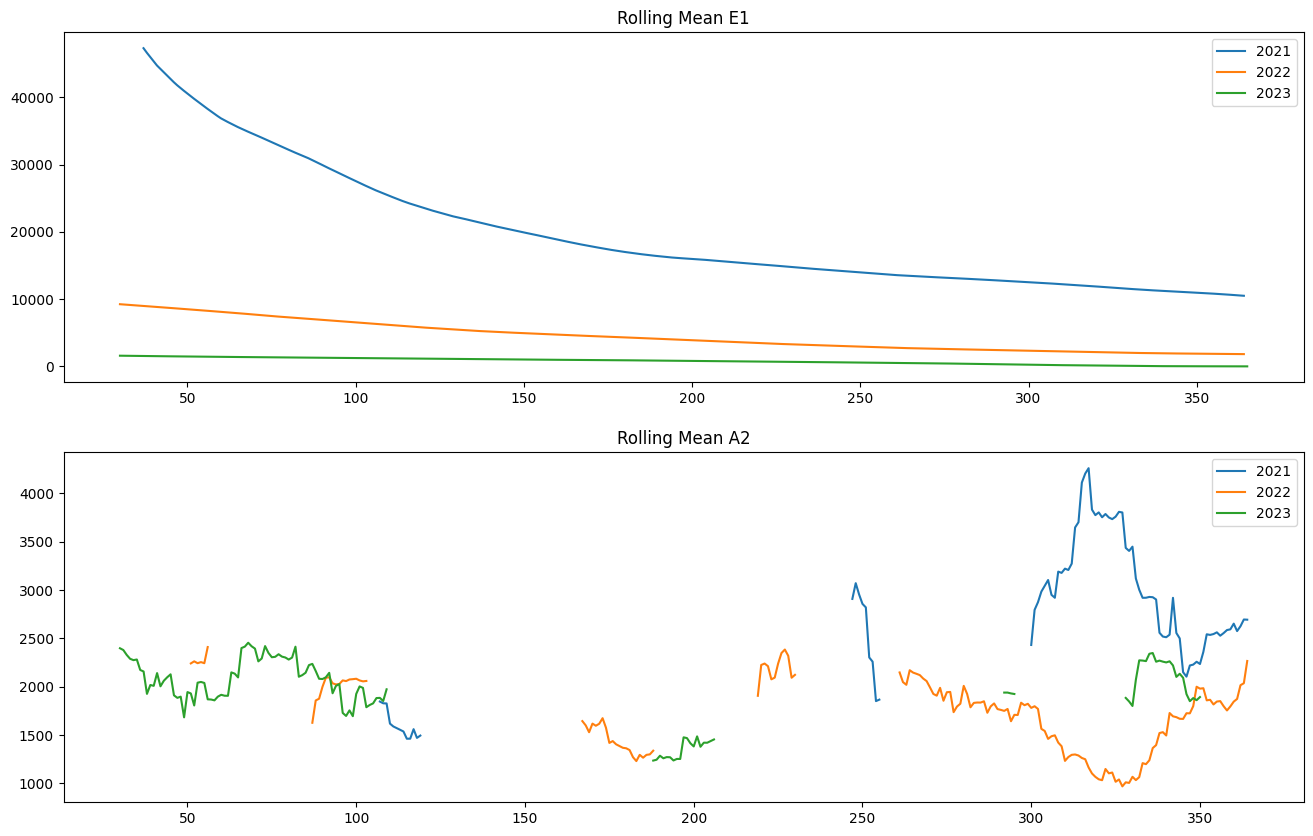

In [9]:
# Trend Line of e1 each year
count = 0
window = 30
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,10))
for area in ["E1", "A2"]:
    ax[count].plot(list(range(1,365)),df.loc[0:363, area].rolling(window=window, center=False).mean(), label='2021')
    ax[count].plot(list(range(1,365)),df.loc[365:365*2-2, area].rolling(window=window, center=False).mean(), label='2022')
    ax[count].plot(list(range(1,366)),df.loc[(365*2):, area].rolling(window=window, center=False).mean(), label='2023')
    # ax[count].plot(list(range(1,54)), df.loc[0:52, area], label="2020")
    # ax[count].plot(list(range(1,54)), df.loc[53:53+52, area], label="2021")
    # ax[count].plot(list(range(1,54)), df.loc[53*2:(53*2)+52, area], label="2022")
    # ax[count].plot(list(range(1,52)), df.loc[(53*3):, area], label="2023")
    ax[count].legend()
    ax[count].set_title(f'Rolling Mean {area}')
    count+=1

In [25]:
data = df.loc[:,['Date', 'E1']]
data.columns = ['ds', 'y']
data.fillna(0.00,inplace=True)
data

,ds,y
0,2021-01-01,13618.92
1,2021-01-02,13877.54
2,2021-01-03,11257.11
3,2021-01-04,12141.87
4,2021-01-05,11929.75
...,...,...
1090,2023-12-27,1204.01
1091,2023-12-28,1411.00
1092,2023-12-29,1487.47
1093,2023-12-30,1441.90


In [26]:
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

## Train Data

In [ ]:
m = NeuralProphet()
m.fit(data, freq="D", epochs=1000)

In [ ]:
plt.plot(data['ds'], data['y'], scalex=True)

In [41]:
jan_df = pd.read_excel('../jan_2024.xlsx')

In [13]:
jan_df

,Date,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
0,01-01-2024,-,-,395.23,-,239.43,2266.50,56.14,67.77,273.88,43.08,9.25,2136.79,-,5487.91,5487.91
1,02-01-2024,-,-,487.04,-,113.40,2054.50,581.31,423.64,670.38,57.81,68.87,2664.21,-,7121.09,7121.09
2,03-01-2024,-,-,99.27,-,128.81,1708.71,181.55,362.96,431.79,189.99,47.53,2050.86,1390.62,6591.91,6591.91
3,04-01-2024,-,-,38.38,-,167.37,1708.10,136.05,187.29,489.71,218.50,77.11,1749.29,1504.21,6275.84,6275.84
4,05-01-2024,-,-,54.47,33.14,141.36,1779.79,81.37,251.72,278.55,47.78,233.40,1264.82,1044.62,5210.91,5210.91
5,06-01-2024,-,-,560.01,-,220.03,1124.05,817.51,453.19,628.69,235.35,230.96,2233.32,-,6503.01,6503.01
6,07-01-2024,-,6.17,571.19,120.00,213.01,1542.65,1123.47,448.35,1109.52,117.92,437.39,2307.53,0.91,7997.98,7997.98
7,08-01-2024,-,-,308.09,137.22,154.77,1810.30,651.65,435.73,480.26,281.71,75.49,2865.28,687.79,7888.19,7888.19
8,09-01-2024,-,-,458.14,289.69,183.61,1892.91,334.37,477.99,718.20,573.38,304.91,3176.21,-,8409.29,8409.29
9,10-01-2024,-,-,376.59,383.00,211.26,1682.14,815.39,276.96,750.29,402.09,103.77,3531.42,1.01,8533.82,8533.82


In [ ]:
future = m.make_future_dataframe(data, periods=31)
forecast = m.predict(future)
forecast['y']=jan_df['E1']
forecast

In [ ]:
m.plot(forecast)

## Monthly Data Prediction

In [14]:
x = data.groupby(pd.Grouper(key='ds', freq='ME')).sum()

In [23]:
jan_df['E1'].sum()

14679.88

In [15]:
x.reset_index(inplace=True)

In [16]:
x.columns

Index(['ds', 'y'], dtype='object')

In [17]:
n = NeuralProphet()
n.fit(x, freq="ME", epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [97.222]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1173: FutureWarning: 'M' is

Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 14550.37it/s, loss=0.0272, v_num=6, MAE=4.71e+4, RMSE=5.76e+4, Loss=0.0284, RegLoss=0.000]


,MAE,RMSE,Loss,RegLoss,epoch
0,479585.500000,552899.875000,0.798135,0.0,0
1,450225.500000,532400.875000,0.735253,0.0,1
2,454217.312500,526330.000000,0.745161,0.0,2
3,404470.500000,485650.937500,0.643590,0.0,3
4,425168.156250,498944.687500,0.678142,0.0,4
...,...,...,...,...,...
995,44172.710938,54034.324219,0.024988,0.0,995
996,44752.250000,56183.195312,0.026001,0.0,996
997,47235.082031,57383.636719,0.028081,0.0,997
998,45585.988281,57035.292969,0.026399,0.0,998


In [19]:
future = n.make_future_dataframe(x, periods=9)
forecast = n.predict(future)
# forecast['y']=jan_df['E1']
forecast

WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [97.222]% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1173: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aux_ts = pd.DataFrame(pd.date_range("1994-

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 122.27it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2024-01-31,None,59791.890625,136677.343750,-76885.445312
1,2024-02-29,None,-38029.699219,124109.234375,-162138.937500
2,2024-03-31,None,68369.640625,110674.359375,-42304.714844
3,2024-04-30,None,78875.882812,97672.898438,-18797.013672
4,2024-05-31,None,99092.429688,84238.062500,14854.364258
5,2024-06-30,None,98391.312500,71236.640625,27154.669922
6,2024-07-31,None,101776.593750,57801.812500,43974.781250
7,2024-08-31,None,87193.468750,44366.937500,42826.531250
8,2024-09-30,None,19713.531250,31365.472656,-11651.941406


In [20]:
n.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



In [156]:
jan_df['Date'] = pd.to_datetime(jan_df['Date'],format='%d-%m-%Y')
for col in  jan_df.columns[1:]:
    jan_df[col] = pd.to_numeric(jan_df[col], errors='coerce')

In [158]:
y = jan_df.groupby(pd.Grouper(key='Date', freq='ME'))
y

## A2

In [44]:
data_a2 = df.loc[:,['Date', 'S2']]
data_a2.columns = ['ds', 'y']
data_a2.fillna(0.00,inplace=True)
data_a2

,ds,y
0,2021-01-01,9387.48
1,2021-01-02,13055.97
2,2021-01-03,13176.51
3,2021-01-04,15575.81
4,2021-01-05,15496.28
...,...,...
1090,2023-12-27,12617.75
1091,2023-12-28,8182.95
1092,2023-12-29,5435.54
1093,2023-12-30,7813.36


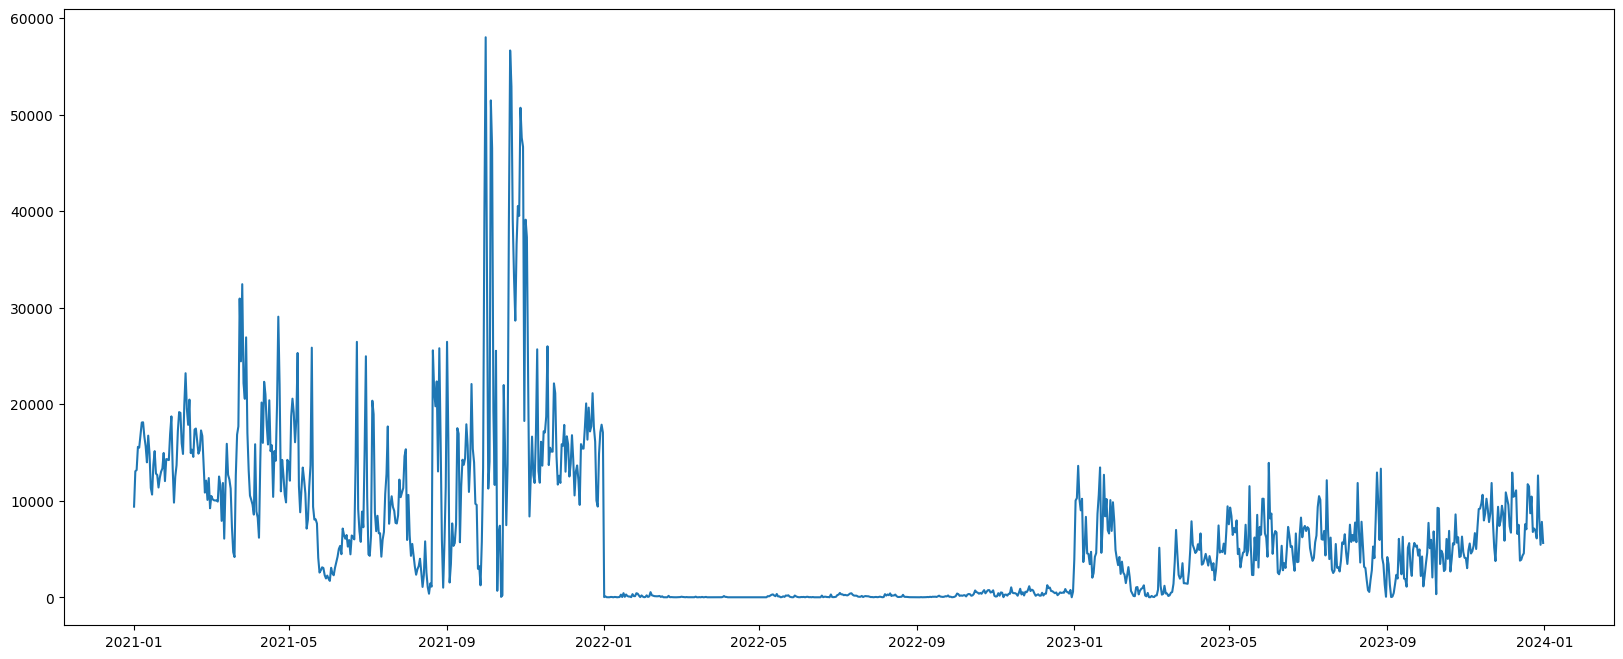

In [49]:
plt.figure(figsize=(20,8))
plt.plot(data_a2['ds'], data_a2['y'], scalex=True)

In [52]:
a2 = NeuralProphet()
a2.fit(data_a2, freq="D", epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._i

Epoch 1000: 100%|██████████| 1000/1000 [00:00<00:00, 4283.89it/s, loss=0.0446, v_num=8, MAE=2.82e+3, RMSE=4.84e+3, Loss=0.0424, RegLoss=0.000] 


,MAE,RMSE,Loss,RegLoss,epoch
0,22348.062500,27696.375000,0.741944,0.0,0
1,17809.986328,22253.732422,0.567688,0.0,1
2,13449.952148,17103.789062,0.400863,0.0,2
3,9773.499023,12650.569336,0.267204,0.0,3
4,7305.989258,9560.927734,0.175869,0.0,4
...,...,...,...,...,...
995,2807.069336,4829.166992,0.042235,0.0,995
996,2799.387939,4784.059082,0.042089,0.0,996
997,2930.045654,5038.692383,0.045518,0.0,997
998,2861.591797,4842.471680,0.043487,0.0,998


In [75]:
future = a2.make_future_dataframe(data_a2, periods=31)
forecast = a2.predict(future)
forecast['y']=jan_df['S2']
forecast

WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.909% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Re

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 191.29it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2024-01-01,273.88,9177.317383,8608.080078,806.769409,-237.531967
1,2024-01-02,670.38,9850.539062,8628.254883,870.466064,351.818237
2,2024-01-03,431.79,9799.725586,8648.424805,934.664307,216.636703
3,2024-01-04,489.71,9655.030273,8668.599609,998.720520,-12.289425
4,2024-01-05,278.55,9460.502930,8688.773438,1062.747559,-291.018372
5,2024-01-06,628.69,9774.636719,8708.948242,1126.288574,-60.600571
6,2024-01-07,1109.52,9950.676758,8729.121094,1189.322998,32.232857
7,2024-01-08,480.26,9763.359375,8749.294922,1251.481445,-237.417679
8,2024-01-09,718.20,10433.682617,8769.467773,1312.393677,351.822235
9,2024-01-10,750.29,10378.146484,8789.641602,1371.990234,216.514099


In [78]:
forecast['y'] = forecast['y']+1000
# forecast['yhat1'] = forecast['yhat1']+8000

In [79]:
a2.plot(forecast)

ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - c:\Miniconda3\envs\intern\Lib\site-packages\neuralprophet\plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [81]:
import numpy as np

In [82]:
changepoint_prior_scale_range = np.linspace(0.001, 0.5, num=5).tolist()
print(changepoint_prior_scale_range)

[0.001, 0.12575, 0.2505, 0.37525, 0.5]
